# Tottenham vs Liverpool, Event Data Analysis

This notebook will follow a basic analysis using match event data from statsbomb. 

## Import Libraries and Packages

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

## Load Competition Data

In [2]:
competitions = pd.read_json("open-data/data/competitions.json")
competitions.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [3]:
competitions["competition_name"].value_counts()

La Liga                    17
Champions League           15
FA Women's Super League     3
FIFA World Cup              1
Women's World Cup           1
UEFA Euro                   1
Premier League              1
NWSL                        1
Name: competition_name, dtype: int64

In [4]:
competitions[competitions["competition_name"] == 'Champions League']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2021-06-22T21:17:46.381,2021-06-13T16:17:31.694,None,2021-06-22T21:17:46.381
9,16,21,Europe,Champions League,male,False,False,2009/2010,2021-06-22T21:24:20.506,2021-06-13T16:17:31.694,None,2021-06-22T21:24:20.506


In [5]:
with open('open-data/data/matches/16/4.json') as matches:
    data = json.load(matches)
    for i in data:
         print('ID:', i['match_id'], i['home_team']['home_team_name'], i['home_score'], '-', i['away_score'], i['away_team']['away_team_name'])

ID: 22912 Tottenham Hotspur 0 - 2 Liverpool


## Load Tottenham Liverpool Game

In [6]:
with open('open-data/data/events/22912.json') as match:
    TOT_LIV_FINAL = json.load(match)

In [7]:
tot_liv_champ_final = pd.json_normalize(TOT_LIV_FINAL, sep="_").assign(match_id="22912")
tot_liv_champ_final.head(10)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_replacement_id,substitution_replacement_name,pass_deflected,block_deflection,foul_committed_offensive,dribble_nutmeg,block_offensive,clearance_other,pass_goal_assist,match_id
0,c4341845-358d-43e7-9af4-9a39aa1d90f1,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
1,6001a7ed-2c00-4cb4-ba33-7ac2b7d07c40,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
2,52cdf1be-4cbd-4026-b802-e5c3dce19e9c,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
3,97668e09-1ce7-4752-912c-b3a5a1bf6013,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
4,68f1458f-6ddb-4626-82cb-6f96eaca8087,5,1,00:00:00.208,0,0,2,1.666205,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
5,0c607c5b-7849-4da0-aa96-3a7d4475b700,6,1,00:00:01.875,0,1,2,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
6,fa083d31-a8b7-4f0a-9379-3233d6f01ab5,7,1,00:00:01.875,0,1,2,1.482954,43,Carry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
7,4ce9fdce-4312-46e6-a9a8-f844fc4d8d1e,8,1,00:00:03.358,0,3,2,2.040173,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
8,2b8b28a3-6309-42c8-8f9f-d085b5ab04fd,9,1,00:00:05.398,0,5,2,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
9,97663e2f-a285-4714-b5f4-3e973e39c8c4,10,1,00:00:05.398,0,5,2,2.305768,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912


## xG and Shot Analysis

In [8]:
shots = tot_liv_champ_final[tot_liv_champ_final["type_name"] == "Shot"]
shots.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_replacement_id,substitution_replacement_name,pass_deflected,block_deflection,foul_committed_offensive,dribble_nutmeg,block_offensive,clearance_other,pass_goal_assist,match_id
33,642e3db4-bfa4-4ed2-9a22-468e68bd6e0a,34,1,00:01:48.568,1,48,3,0.390909,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
341,93adc671-0697-4ad0-8f30-6dea062f3b03,342,1,00:09:04.723,9,4,15,1.237037,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
586,e18a3a5e-b587-43f3-8dea-a25a14517c14,587,1,00:16:48.573,16,48,25,1.438182,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
757,2439947c-b340-48a3-a8fe-b4e217136ccd,758,1,00:20:31.085,20,31,35,0.179142,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
767,7c1825a8-ff22-4d87-9a58-b287f0f3104a,768,1,00:21:53.381,21,53,37,1.154443,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912


### Shot Map

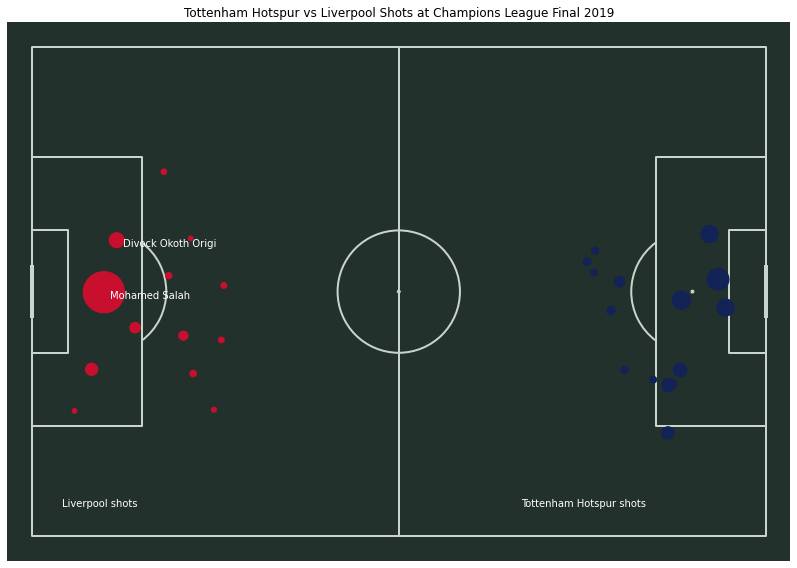

In [9]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 8))

home_team = 'Tottenham Hotspur'
away_team = 'Liverpool'

pitch_width = 120
pitch_height = 80

for i, shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    
    goal = shot['shot_outcome_name']=='Goal'
    team_name = shot['team_name']
    
    circle_size = np.sqrt(shot['shot_statsbomb_xg'] * 15)
    
    if team_name == home_team:
        if goal:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='#132257')
            plt.text((x+1), pitch_height-y+1, shot['player_name'], color="white")
        else:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='#132257')
    elif team_name == away_team:
        if goal:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color="#C8102E")
            plt.text((pitch_width-x+1), y+1, shot['player_name'], color="white")
        else:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='#C8102E')
    
    ax.add_patch(shot_circle)

plt.text(5, 75, away_team + ' shots', color="white")
plt.text(80, 75, home_team + ' shots', color="white")

plt.title('Tottenham Hotspur vs Liverpool Shots at Champions League Final 2019');

In [10]:
liv_shots = shots[shots["team_name"] == away_team]
tot_shots = shots[shots["team_name"] == home_team]

liv_total_xg = sum(liv_shots["shot_statsbomb_xg"])
tot_total_xg = sum(tot_shots["shot_statsbomb_xg"])

print("Liverpool xG, Tottenham xG")
liv_total_xg, tot_total_xg

Liverpool xG, Tottenham xG


(1.1677984470000002, 1.115154864)

### xG Flow Map

In [11]:
tot_xG = [0]
liv_xG = [0]
tot_min = [0]
liv_min = [0]

for i, shot in shots.iterrows():
    if shot["team_name"] == home_team:
        tot_xG.append(shot["shot_statsbomb_xg"])
        tot_min.append(shot["minute"])
    else:
        liv_xG.append(shot["shot_statsbomb_xg"])
        liv_min.append(shot["minute"])

In [12]:
def cumilative_sum(xg_list):
    return [sum(xg_list[:i+1]) for i in range(len(xg_list))]

tot_cumilative = cumilative_sum(tot_xG)
liv_cumilative = cumilative_sum(liv_xG)

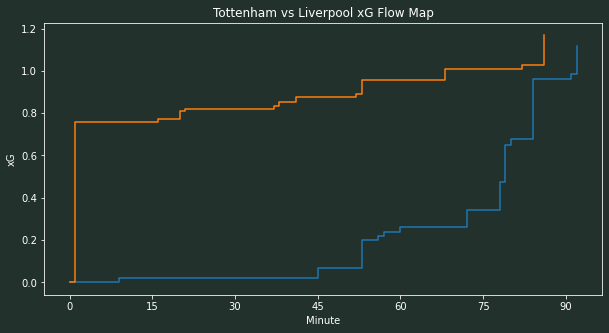

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor("#22312b")
ax.patch.set_facecolor("#22312b")

ax.step(x=tot_min, y=tot_cumilative,where="post")
ax.step(x=liv_min, y=liv_cumilative,where="post")


# Set the borders to a given color...
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.xticks([0,15,30,45,60,75,90], color="white")
plt.xlabel("Minute", color="white")
plt.ylabel("xG", color="white")
plt.title("Tottenham vs Liverpool xG Flow Map", color="white");

The analysis in this section has multiple points to show. Firstly, Liverpool were the dominant team in the first half specifically, however not by much. The penalty that Salah scored jumped the xG a lot, however, after that the teams were pretty even though Liverpool were creating more opportunities. However, the second half shows a different picture as Tottenham definetly took control of that half and created multiple high-quality chances. However, they could not score them.

## Positional Analysis

### Average Positions

In [14]:
# Create new columns x, y
tot_liv_champ_final["x"] = 0
tot_liv_champ_final["y"] = 0

tot_liv_champ_final["location"] = tot_liv_champ_final["location"].replace(np.nan, 0)

# if location is 0, make it -1 else find the location x and y value
for i, row in tot_liv_champ_final.iterrows():
    if row["location"] == 0:
        tot_liv_champ_final.at[i, "x"] = -1
        tot_liv_champ_final.at[i, "y"] = -1
    else:
        tot_liv_champ_final.at[i, "x"] = row["location"][0]
        tot_liv_champ_final.at[i, "y"] = row["location"][1]


tot_liv_champ_final.head(10)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,pass_deflected,block_deflection,foul_committed_offensive,dribble_nutmeg,block_offensive,clearance_other,pass_goal_assist,match_id,x,y
0,c4341845-358d-43e7-9af4-9a39aa1d90f1,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912,-1,-1
1,6001a7ed-2c00-4cb4-ba33-7ac2b7d07c40,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912,-1,-1
2,52cdf1be-4cbd-4026-b802-e5c3dce19e9c,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912,-1,-1
3,97668e09-1ce7-4752-912c-b3a5a1bf6013,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912,-1,-1
4,68f1458f-6ddb-4626-82cb-6f96eaca8087,5,1,00:00:00.208,0,0,2,1.666205,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912,61,41
5,0c607c5b-7849-4da0-aa96-3a7d4475b700,6,1,00:00:01.875,0,1,2,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912,34,44
6,fa083d31-a8b7-4f0a-9379-3233d6f01ab5,7,1,00:00:01.875,0,1,2,1.482954,43,Carry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912,34,44
7,4ce9fdce-4312-46e6-a9a8-f844fc4d8d1e,8,1,00:00:03.358,0,3,2,2.040173,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912,37,44
8,2b8b28a3-6309-42c8-8f9f-d085b5ab04fd,9,1,00:00:05.398,0,5,2,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912,88,2
9,97663e2f-a285-4714-b5f4-3e973e39c8c4,10,1,00:00:05.398,0,5,2,2.305768,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912,33,76


In [15]:
# Create table with average positions
tot = tot_liv_champ_final[tot_liv_champ_final["team_name"] == home_team]
liv = tot_liv_champ_final[tot_liv_champ_final["team_name"] == away_team]

tot_pos = tot[tot["x"] != -1]
liv_pos = liv[liv["x"] != -1]

tot_pos_subset = tot_pos[["player_name", "player_id", "x", "y"]]
liv_pos_subset = liv_pos[["player_name", "player_id", "x", "y"]]

tot_avg_pos = tot_pos_subset.groupby(["player_name"]).mean()
liv_avg_pos = liv_pos_subset.groupby(["player_name"]).mean()

tot_avg_pos

,player_id,x,y
player_name,,,
Bamidele Alli,3094.0,74.346667,29.940000
Christian Dannemann Eriksen,3043.0,69.967949,46.217949
Danny Rose,3594.0,57.725490,8.117647
Eric Dier,10956.0,55.944444,41.916667
Fernando Llorente Torres,3486.0,86.947368,38.894737
Harry Kane,10955.0,81.921569,35.088235
Harry Winks,3082.0,56.130137,38.527397
Heung-Min Son,3083.0,76.915493,34.500000
Hugo Lloris,3099.0,8.551515,38.903030


In [16]:
# Drop substitutes
tot_start = tot_liv_champ_final.iloc[[0]]
tot_start = tot_start["tactics_lineup"][0]

tot_starting_lineup = set()
for data in tot_start:
    id = data['player']['id']
    tot_starting_lineup.add(id)

tot_drop_players = []
for i, row in tot_avg_pos.iterrows():
    if not row['player_id'] in tot_starting_lineup:
        tot_drop_players.append(i)

        
tot_avg_pos = tot_avg_pos.drop(tot_drop_players)
tot_avg_pos

,player_id,x,y
player_name,,,
Bamidele Alli,3094.0,74.346667,29.940000
Christian Dannemann Eriksen,3043.0,69.967949,46.217949
Danny Rose,3594.0,57.725490,8.117647
Harry Kane,10955.0,81.921569,35.088235
Harry Winks,3082.0,56.130137,38.527397
Heung-Min Son,3083.0,76.915493,34.500000
Hugo Lloris,3099.0,8.551515,38.903030
Jan Vertonghen,3077.0,33.484716,23.039301
Kieran Trippier,3308.0,59.403315,71.265193


In [17]:
liv_start = tot_liv_champ_final.iloc[[1]]
liv_start = liv_start["tactics_lineup"][1]

liv_starting_lineup = set()
for data in liv_start:
    id = data['player']['id']
    liv_starting_lineup.add(id)

liv_drop_players = []
for i, row in liv_avg_pos.iterrows():
    if not row['player_id'] in liv_starting_lineup:
        liv_drop_players.append(i)
        
liv_avg_pos = liv_avg_pos.drop(liv_drop_players)
liv_avg_pos

,player_id,x,y
player_name,,,
Alisson RamsÃ©s Becker,5547.0,8.402174,40.934783
Andrew Robertson,3655.0,50.821429,11.407143
FÃ¡bio Henrique Tavares,3247.0,52.333333,41.967742
Georginio Wijnaldum,3567.0,64.769231,27.876923
Jordan Brian Henderson,3532.0,64.975207,54.165289
JoÃ«l Andre Job Matip,3502.0,31.439560,54.164835
Mohamed Salah,3531.0,87.985507,54.739130
Roberto Firmino Barbosa de Oliveira,3535.0,77.956522,37.369565
Sadio ManÃ©,3629.0,77.597122,22.266187


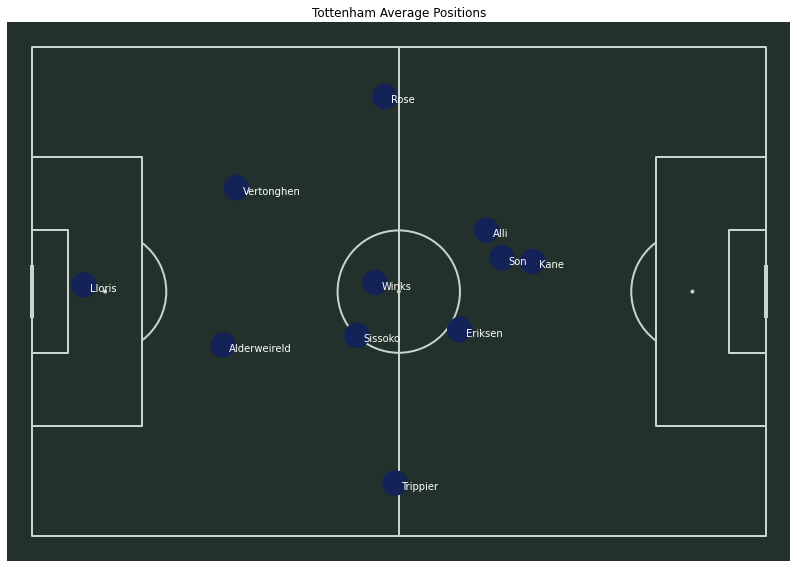

In [23]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 8))


for i, row in tot_avg_pos.iterrows():
    x = row["x"]
    y = row["y"]
    player_circle = plt.Circle((x, y), 2, color='#132257')
    last_name = i.split(" ")
    last_name = last_name[len(last_name)-1]
    plt.text((x+1), y+1, last_name, color="white")
    ax.add_patch(player_circle)

plt.title("Tottenham Average Positions");

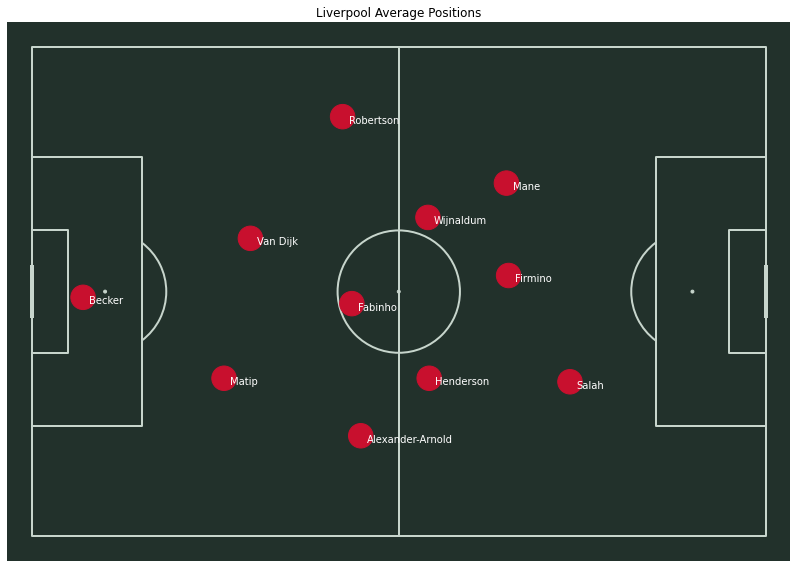

In [25]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 8))


for i, row in liv_avg_pos.iterrows():
    x = row["x"]
    y = row["y"]
    player_circle = plt.Circle((x, y), 2, color='#C8102E')
    last_name = i.split(" ")
    last_name = last_name[len(last_name)-1]
    if last_name == "Dijk":
        last_name = "Van Dijk"
    elif last_name == "Tavares":
        last_name = "Fabinho"
    elif last_name == "ManÃ©":
        last_name = "Mane"
    elif last_name == "Oliveira":
        last_name = "Firmino"
    plt.text((x+1), y+1, last_name, color="white")
    ax.add_patch(player_circle)
    
plt.title("Liverpool Average Positions");